In [263]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [264]:
df = pd.read_csv('PrepHR.csv')
df = df.drop(columns='Unnamed: 0')

In [265]:
df = df.dropna()

In [266]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [267]:
df['Education'].unique()

array(['Higher Secondary', 'High School', 'Masters', 'Bacherlors',
       'Doctorate'], dtype=object)

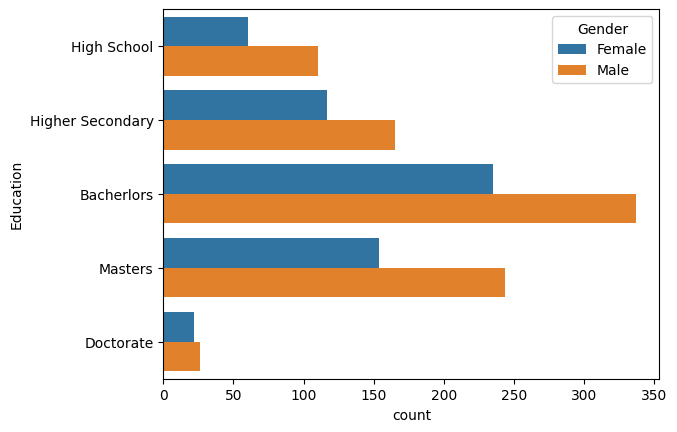

In [268]:
order = ['High School','Higher Secondary','Bacherlors','Masters','Doctorate']
sns.countplot(data = df,y='Education',order=order,hue='Gender')
plt.show()

<Axes: xlabel='count', ylabel='Department'>

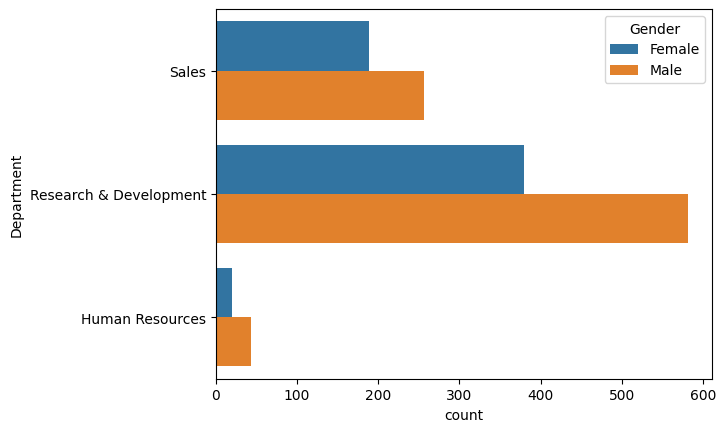

In [269]:
sns.countplot(data = df,y='Department',hue='Gender')

<Axes: xlabel='count', ylabel='MaritalStatus'>

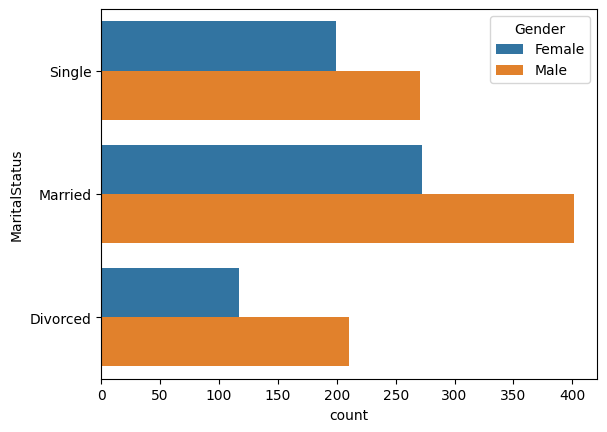

In [270]:
sns.countplot(data = df,y='MaritalStatus',hue='Gender')

<Axes: xlabel='count', ylabel='Gender'>

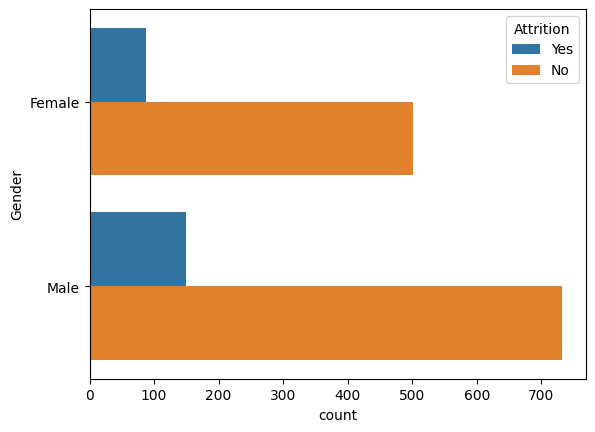

In [271]:
sns.countplot(data = df,y='Gender',hue='Attrition')

In [272]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['Gender'], df['Attrition'])

# Perform the chi-square test
chi2, p, _, _ = chi2_contingency(contingency_table)

# Print the test results
print("Chi-square statistic:", chi2)
print("p-value:", p)

Chi-square statistic: 1.1169671241970975
p-value: 0.29057244902890855


In [273]:
categorical_columns = df.select_dtypes(include=['object'])

# Create an empty DataFrame for the correlation table
correlation_table = pd.DataFrame(index=categorical_columns.columns, columns=categorical_columns.columns)

# Perform the chi-square test for each pair of categorical columns
for col1 in categorical_columns.columns:
    for col2 in categorical_columns.columns:
        contingency_table = pd.crosstab(categorical_columns[col1], categorical_columns[col2])
        chi2, p, _, _ = chi2_contingency(contingency_table)
        correlation_table.loc[col1, col2] = p

In [274]:

correlation_table

,Attrition,BusinessTravel,Department,Education,EducationField,Gender,JobRole,MaritalStatus,OverTime
Attrition,0.0,0.000006,0.004526,0.545525,0.006774,0.290572,0.0,0.0,0.0
BusinessTravel,0.000006,0.0,0.995236,0.587116,0.879649,0.133229,0.744826,0.111618,0.240053
Department,0.004526,0.995236,0.0,0.936588,0.0,0.227127,0.0,0.15567,0.954275
Education,0.545525,0.587116,0.936588,0.0,0.009195,0.545698,0.038064,0.617163,0.405205
EducationField,0.006774,0.879649,0.0,0.009195,0.0,0.709016,0.0,0.477613,0.881482
Gender,0.290572,0.133229,0.227127,0.545698,0.709016,0.0,0.041954,0.169667,0.121548
JobRole,0.0,0.744826,0.0,0.038064,0.0,0.041954,0.0,0.042464,0.583831
MaritalStatus,0.0,0.111618,0.15567,0.617163,0.477613,0.169667,0.042464,0.0,0.664739
OverTime,0.0,0.240053,0.954275,0.405205,0.881482,0.121548,0.583831,0.664739,0.0


In [275]:
categorical_columns = df.select_dtypes(include=['object'])

# Create an empty DataFrame for the correlation table
correlation_table = pd.DataFrame(index=categorical_columns.columns, columns=categorical_columns.columns)

# Perform the chi-square test for each pair of categorical columns
for col1 in categorical_columns.columns:
    for col2 in categorical_columns.columns:
        contingency_table = pd.crosstab(categorical_columns[col1], categorical_columns[col2])
        chi2, p, _, _ = chi2_contingency(contingency_table)
        correlation_table.loc[col1, col2] = p

# Convert p-values to numeric data type
correlation_table = correlation_table.astype(float)

<Axes: >

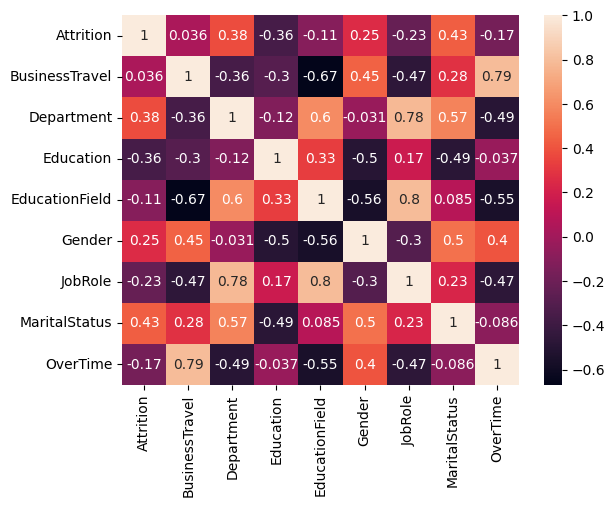

In [276]:
sns.heatmap(data=correlation_table.corr(),annot = True)

In [277]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

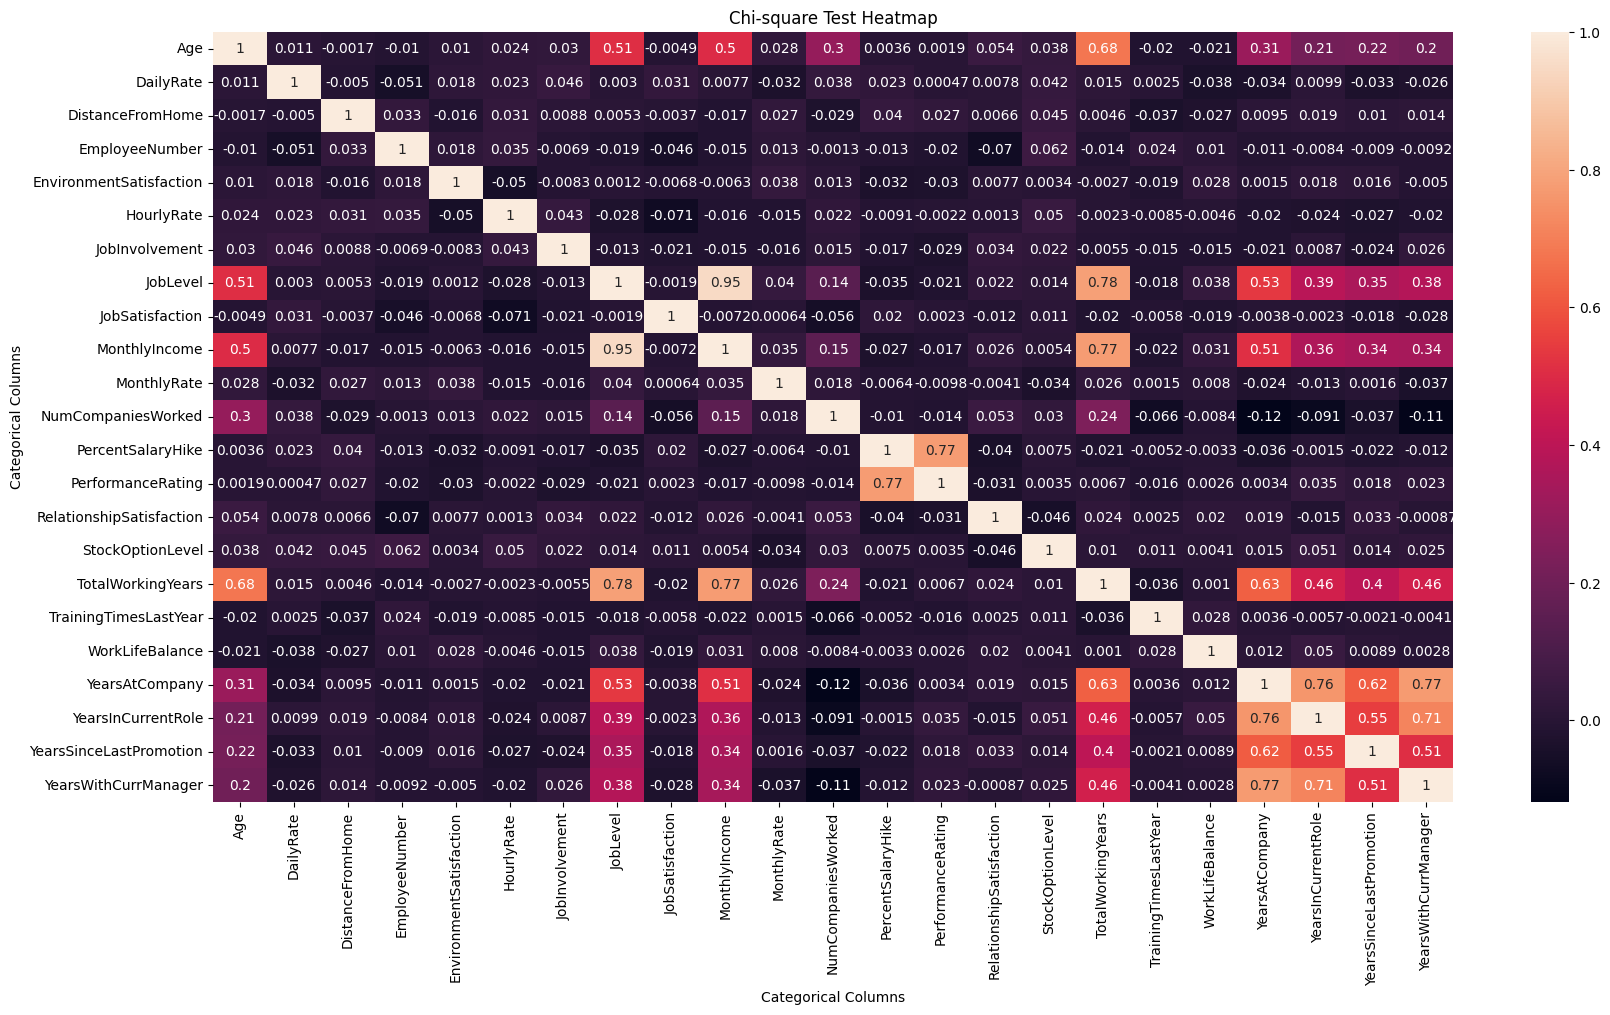

In [278]:
df2= df.drop(columns=['StandardHours'])
numerical_col = df2.select_dtypes(include=['int64'])
# sns.heatmap(data = numerical_col.corr(),annot = True)


plt.figure(figsize=(20, 10))

# Create the heatmap using seaborn
sns.heatmap(data=numerical_col.corr(), annot=True)
# Set plot labels and title
plt.xlabel('Categorical Columns')
plt.ylabel('Categorical Columns')
plt.title('Chi-square Test Heatmap')

# Display the plot
plt.show()

- There are total 10 columns have correaltion on numerical columns
- There are 3 columns have correlation on categorical columns


In [279]:
df.describe().columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [280]:
df['StandardHours'].unique()

array([80])

In [281]:
df2 = df.copy(deep=True)

In [282]:
from scipy.stats import pointbiserialr
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df2['Age'] = pd.to_numeric(df2['Age'], errors='coerce')
df2['Attrition'] = label_encoder.fit_transform(df2['Attrition'])


categorical_column = df2['Attrition']
numerical_column = df2['MonthlyIncome']


correlation, p_value = pointbiserialr(categorical_column, numerical_column)


print("Point-biserial correlation coefficient:", correlation)
print("p-value:", p_value)


Point-biserial correlation coefficient: -0.1598395823849888
p-value: 7.147363985353831e-10


- attrition and monthly income Point-biserial correlation coefficient: -0.1598395823849888
p-value: 7.147363985353831e-10m

In [283]:
categorical_columns = df.select_dtypes(include=['object'])
categorical_columns.columns


Index(['Attrition', 'BusinessTravel', 'Department', 'Education',
       'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime'],
      dtype='object')

In [284]:
df3 = df2[['Attrition','Age', 'DailyRate', 'DistanceFromHome', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']]

In [285]:
import pandas as pd
from scipy.stats import pointbiserialr
import numpy as np

# Assuming you have a DataFrame named df2 with 'Attrition' and numerical columns

# Create an empty DataFrame to store the correlation table
correlation_table = pd.DataFrame(columns=['Numerical Column', 'Correlation', 'p-value'])

# Get a list of all columns in the data frame (excluding 'Attrition')
numerical_columns = df3.select_dtypes(include=['number']).columns

# Iterate over the numerical columns and calculate the point-biserial correlation
for column in numerical_columns:
    # Remove rows with NaN or infinite values in the numerical column
    valid_rows = ~np.isnan(df3[column]) & ~np.isinf(df3[column])
    correlation, p_value = pointbiserialr(df3['Attrition'][valid_rows], df3[column][valid_rows])
    correlation_table = pd.concat([correlation_table, pd.DataFrame({'Numerical Column': [column], 'Correlation': [correlation], 'p-value': [p_value]})], ignore_index=True)

# Print the correlation table



/tmp/ipykernel_3678/741875699.py:18: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  correlation_table = pd.concat([correlation_table, pd.DataFrame({'Numerical Column': [column], 'Correlation': [correlation], 'p-value': [p_value]})], ignore_index=True)


In [286]:
correlation_table.style.background_gradient(cmap='Blues')


,Numerical Column,Correlation,p-value
0,Attrition,1.000000,0.000000
1,Age,-0.159205,0.000000
2,DailyRate,-0.056652,0.029858
3,DistanceFromHome,0.077924,0.002793
4,EmployeeNumber,-0.010577,0.685328
5,EnvironmentSatisfaction,-0.103369,0.000072
6,HourlyRate,-0.006846,0.793135
7,JobInvolvement,-0.130016,0.000001
8,JobLevel,-0.169105,0.000000
9,JobSatisfaction,-0.103481,0.000070


In [287]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

<Axes: xlabel='YearsWithCurrManager', ylabel='MonthlyIncome'>

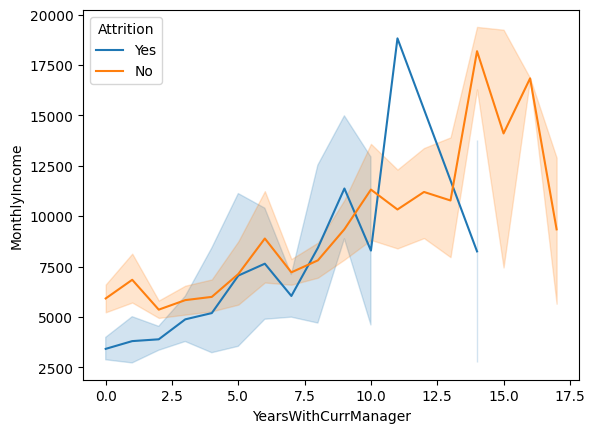

In [288]:
sns.lineplot(data=df, x='YearsWithCurrManager',y='MonthlyIncome',hue='Attrition')

<Axes: xlabel='YearsSinceLastPromotion', ylabel='MonthlyIncome'>

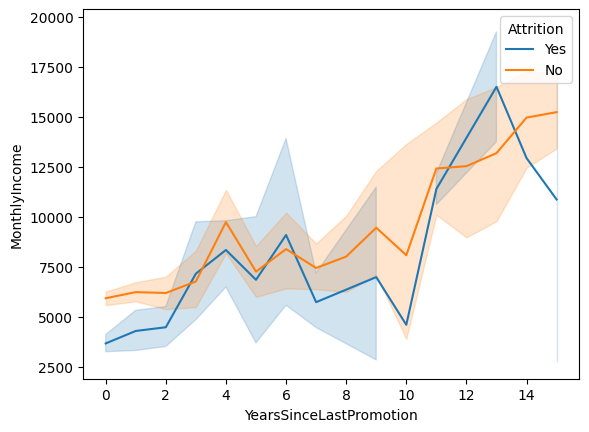

In [289]:
sns.lineplot(data=df, x='YearsSinceLastPromotion',y='MonthlyIncome',hue='Attrition')

<Axes: xlabel='YearsInCurrentRole', ylabel='MonthlyIncome'>

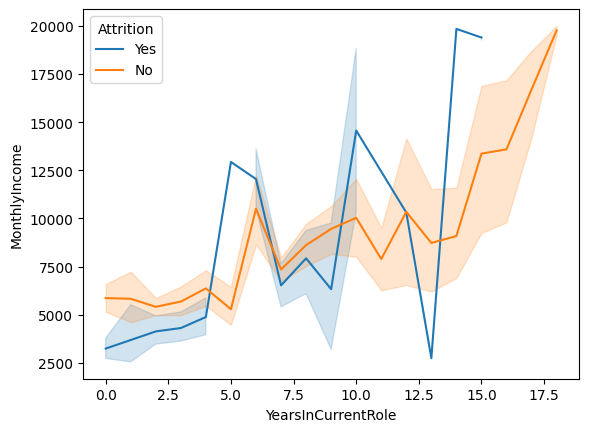

In [290]:
sns.lineplot(data=df, x='YearsInCurrentRole',y='MonthlyIncome',hue='Attrition')

<Axes: xlabel='TotalWorkingYears', ylabel='MonthlyIncome'>

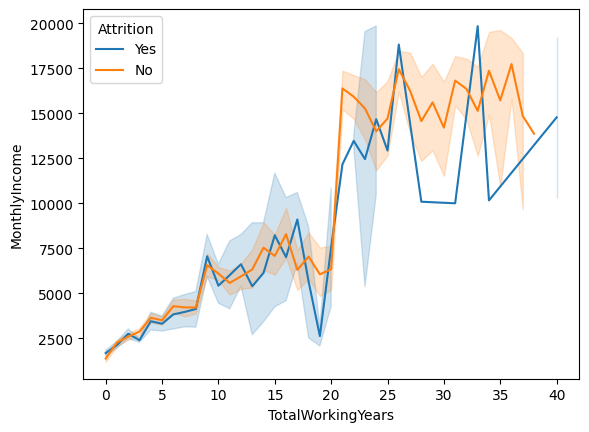

In [291]:
sns.lineplot(data=df, x='TotalWorkingYears',y='MonthlyIncome',hue='Attrition')

<Axes: xlabel='StockOptionLevel', ylabel='MonthlyIncome'>

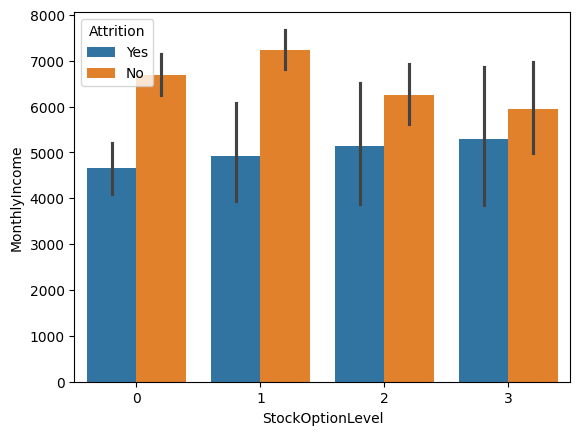

In [292]:
sns.barplot(data=df, x='StockOptionLevel',y='MonthlyIncome',hue='Attrition')

<Axes: xlabel='RelationshipSatisfaction', ylabel='MonthlyIncome'>

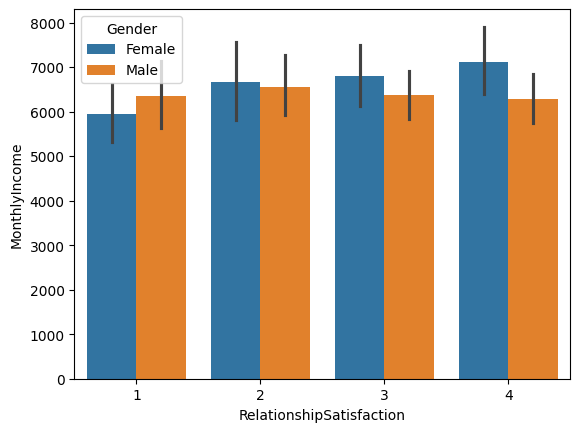

In [293]:
sns.barplot(data=df, x='RelationshipSatisfaction',y='MonthlyIncome',hue='Gender')

<Axes: xlabel='RelationshipSatisfaction', ylabel='MonthlyIncome'>

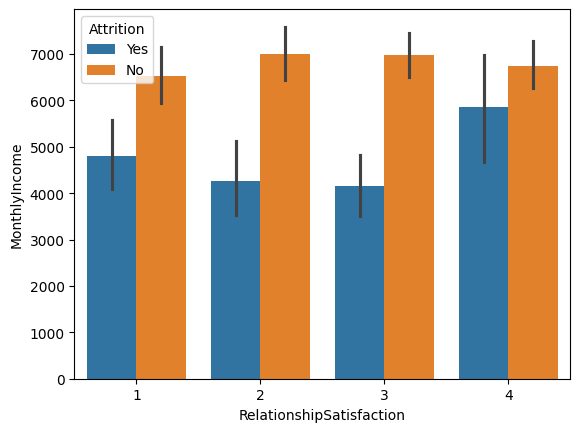

In [294]:
sns.barplot(data=df, x='RelationshipSatisfaction',y='MonthlyIncome',hue='Attrition')

<Axes: xlabel='PerformanceRating', ylabel='MonthlyIncome'>

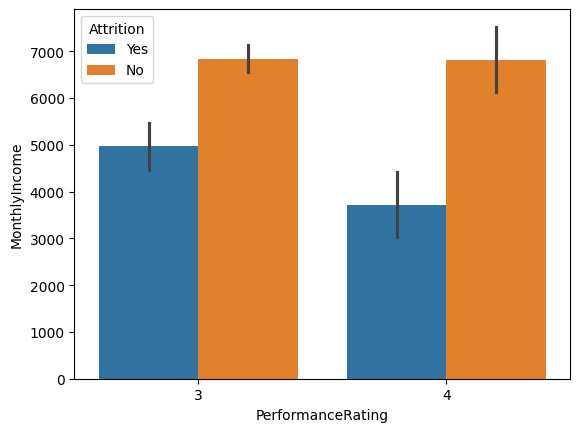

In [295]:
sns.barplot(data=df, x='PerformanceRating',y='MonthlyIncome',hue='Attrition')

<Axes: xlabel='PercentSalaryHike', ylabel='MonthlyIncome'>

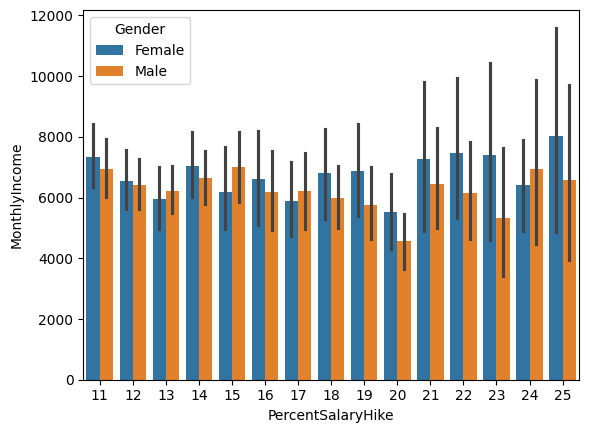

In [296]:
sns.barplot(data=df, x='PercentSalaryHike',y='MonthlyIncome',hue='Gender')

<Axes: xlabel='PercentSalaryHike', ylabel='MonthlyIncome'>

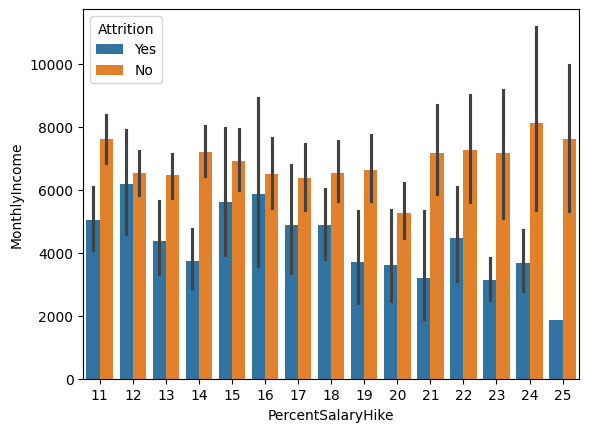

In [297]:

sns.barplot(data=df, x='PercentSalaryHike',y='MonthlyIncome',hue='Attrition')

<Axes: xlabel='OverTime', ylabel='MonthlyIncome'>

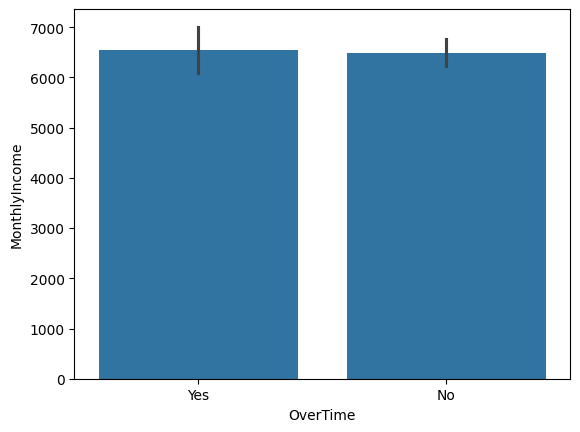

In [298]:
sns.barplot(data=df, x='OverTime',y='MonthlyIncome')

<Axes: xlabel='NumCompaniesWorked', ylabel='MonthlyIncome'>

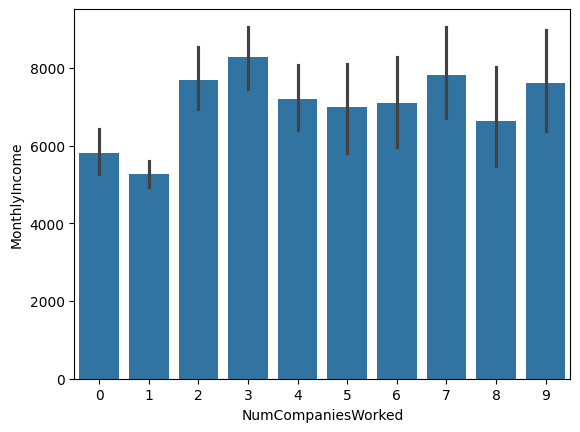

In [299]:
sns.barplot(data=df, x='NumCompaniesWorked',y='MonthlyIncome')

<Axes: xlabel='JobInvolvement', ylabel='MonthlyIncome'>

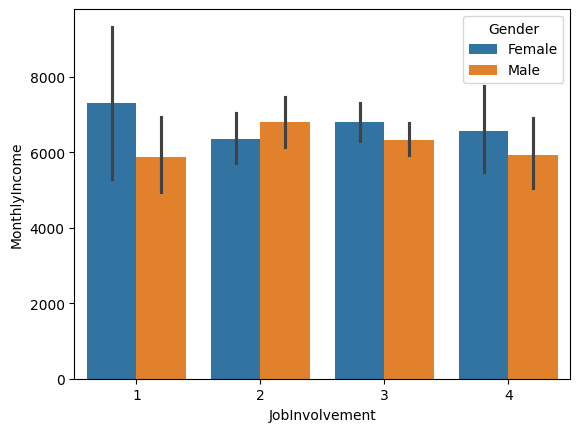

In [300]:
sns.barplot(data=df, x='JobInvolvement',y='MonthlyIncome',hue='Gender')

<Axes: xlabel='JobInvolvement', ylabel='MonthlyIncome'>

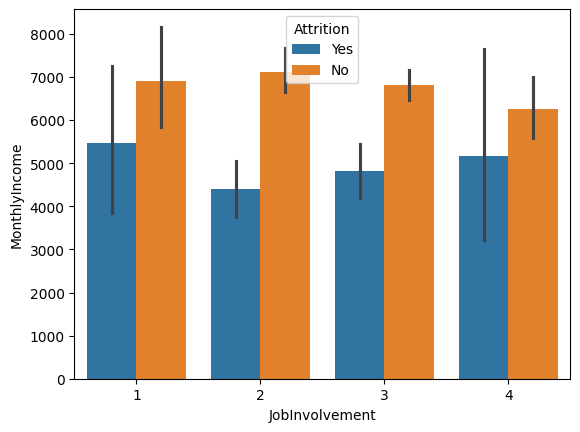

In [301]:
sns.barplot(data=df, x='JobInvolvement',y='MonthlyIncome',hue='Attrition')

<Axes: xlabel='Gender', ylabel='MonthlyIncome'>

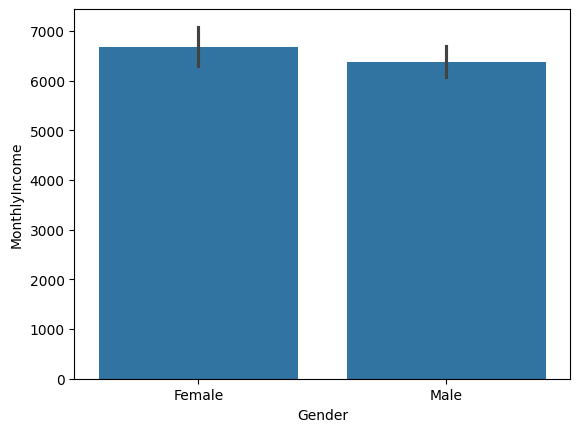

In [302]:
sns.barplot(data=df, x='Gender',y='MonthlyIncome')

<Axes: xlabel='EnvironmentSatisfaction', ylabel='MonthlyIncome'>

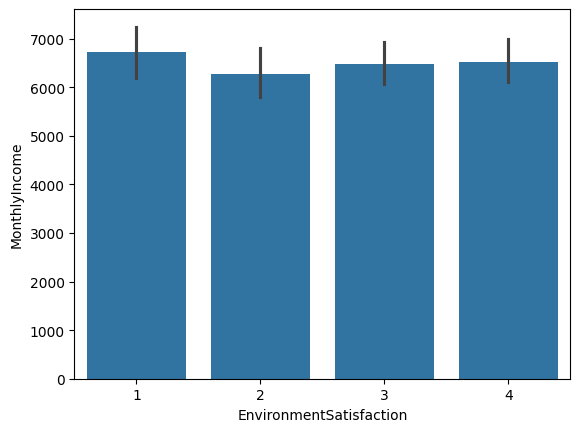

In [303]:
sns.barplot(data=df, x='EnvironmentSatisfaction',y='MonthlyIncome')

<Axes: xlabel='EducationField', ylabel='MonthlyIncome'>

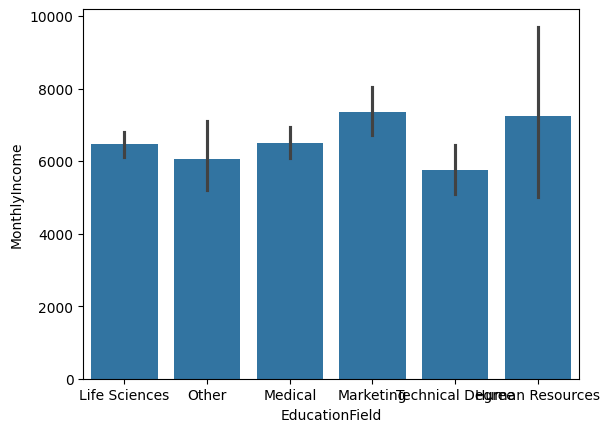

In [304]:
sns.barplot(data=df, x='EducationField',y='MonthlyIncome')

<Axes: xlabel='Education', ylabel='MonthlyIncome'>

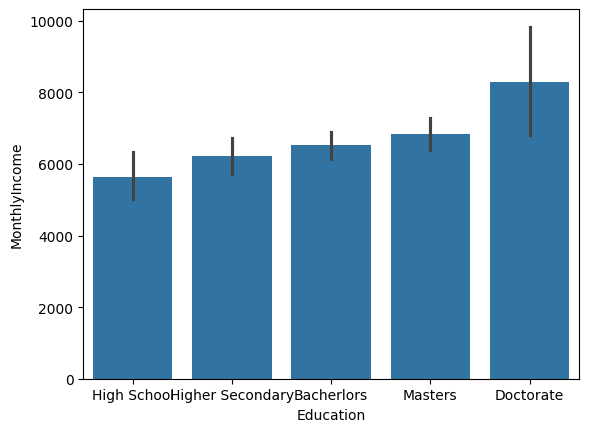

In [305]:
order = ['High School','Higher Secondary','Bacherlors','Masters','Doctorate']
sns.barplot(data=df, x='Education',y='MonthlyIncome',order=order)

<Axes: xlabel='Department', ylabel='MonthlyIncome'>

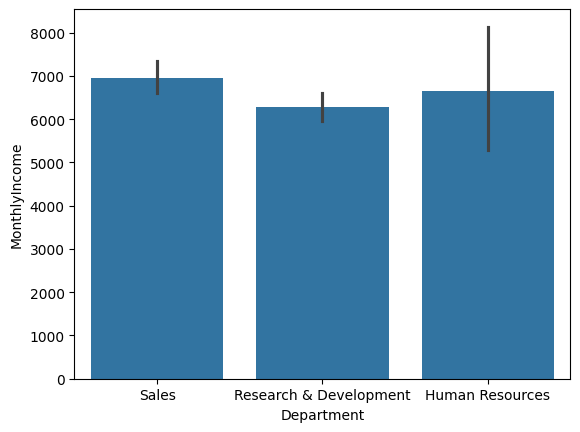

In [306]:
sns.barplot(data=df, x='Department',y='MonthlyIncome')

<Axes: xlabel='Age', ylabel='MonthlyIncome'>

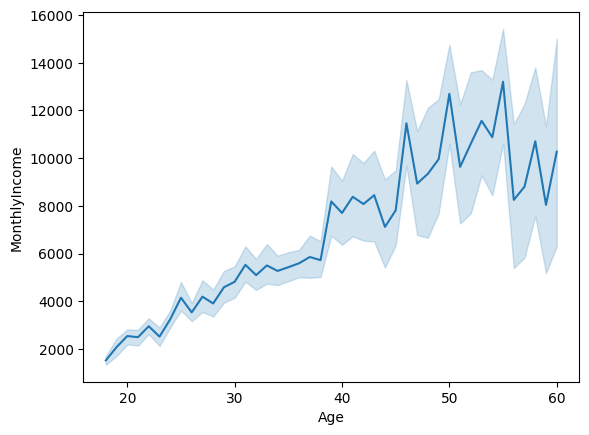

In [307]:
sns.lineplot(data=df, x='Age',y='MonthlyIncome')

<Axes: xlabel='Attrition', ylabel='MonthlyIncome'>

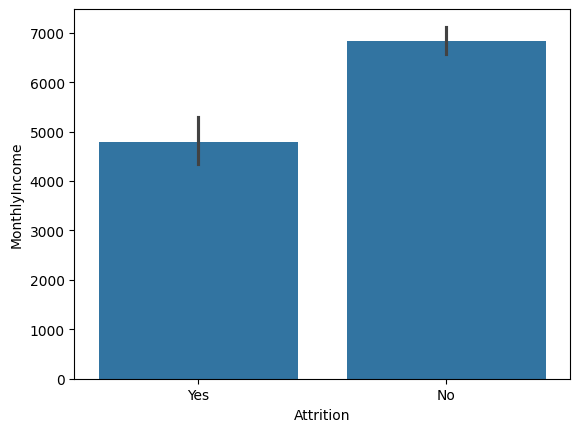

In [308]:
sns.barplot(data=df, x='Attrition',y='MonthlyIncome')

In [331]:
sns.boxplot(data=df,x='EmployeeNumber',y='MonthlyIncome')

KeyboardInterrupt: 

To visualize relationships between different types of data, including numerical vs. categorical, category vs. category, and numerical vs. numerical, you can use various types of charts and graphs. Here are some commonly used chart types for each type of relationship:

Numerical vs. Categorical:

Box Plot or Violin Plot: These plots can show the distribution of numerical data for different categories or groups within a categorical variable. Box plots provide information about medians, quartiles, and potential outliers, while violin plots display the entire distribution.
Bar Plot or Grouped Bar Plot: A bar plot can represent the mean or sum of numerical data for different categories in a categorical variable. Grouped bar plots can be used to compare multiple numerical variables across categories.
Swarm Plot or Strip Plot: These plots show individual data points (e.g., data points for each category) along a numerical axis, providing a detailed view of the distribution.
Category vs. Category:

Stacked Bar Chart: Stacked bar charts are useful for visualizing the distribution of one categorical variable within categories of another categorical variable. Each category in the secondary variable is divided into segments based on the distribution of the primary variable.
Clustered Bar Chart: Clustered bar charts allow you to compare the distribution of two or more categorical variables side by side, making it easier to identify relationships and trends.
Heatmap: A heatmap can display the relationship between two categorical variables using color-coding to represent the frequency or density of combinations.
Numerical vs. Numerical:

Scatter Plot: Scatter plots are used to visualize the relationship between two numerical variables. Each data point is represented as a dot on the plot, and the pattern of dots can reveal correlations, clusters, or trends.
Line Chart: Line charts can show trends and patterns in numerical data over a continuous range. This type of chart is useful for time series data or when you want to display the progression of a variable over a continuous range.
Correlation Matrix Heatmap: When you have multiple numerical variables, a correlation matrix heatmap can provide a quick overview of the pairwise correlations between them. The heatmap is color-coded to indicate the strength and direction of the correlations.
Category vs. Numerical (Special Case - Often used for ANOVA):

Box Plot: Box plots can be used to compare the distribution of a numerical variable among different categories within a categorical variable. This is especially useful for identifying differences in the central tendency and spread of data across categories.
Time Series Data:

Line Chart: Line charts are commonly used to display trends over time, making them suitable for time series data.
Seasonal Decomposition: Time series data can be decomposed into trend, seasonal, and residual components, which can be visualized separately to understand underlying patterns.
Autocorrelation and Partial Autocorrelation Plots: These plots help analyze the temporal dependencies in time series data and can assist in model selection for forecasting.
The choice of chart type depends on the nature of your data and the specific insights you want to convey. It's essential to select the chart that best represents the relationships and patterns in your data accurately. Additionally, data visualization tools like Matplotlib, Seaborn, and Plotly in Python, or ggplot2 in R, provide a variety of options for creating these charts.

<Axes: xlabel='Attrition', ylabel='count'>

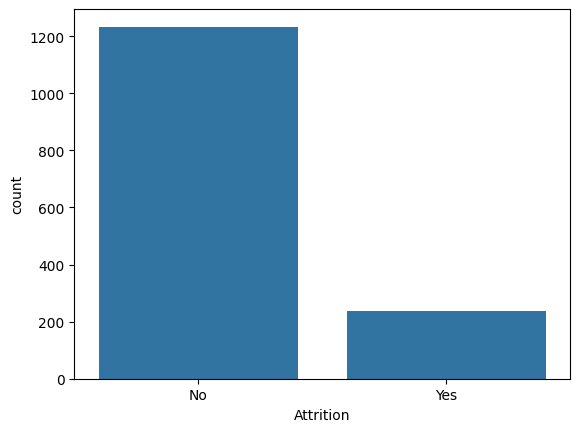

In [309]:
sns.barplot(df['Attrition'].value_counts())

In [310]:
df4 = df[df['Attrition'] == 'No'].sample(237)
df5 = df[df['Attrition'] != 'No']

In [311]:
df6 = pd.concat([df4, df5])
df6.Attrition.value_counts()

Attrition
No     237
Yes    237
Name: count, dtype: int64

In [312]:
df6.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [313]:
df7 = df6.copy(deep=True)

In [314]:
df6 = df6.drop(columns=['StandardHours','EmployeeNumber'],axis=1)

In [315]:
df8 = pd.get_dummies(df7, columns=['BusinessTravel', 'Department', 'Education', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime'], 
                     drop_first=True)

In [316]:
y = df8['Attrition']
X = df8.drop('Attrition', axis=1)

In [317]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [318]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [319]:

clf = RandomForestClassifier()
clf.fit(X, y)

RandomForestClassifier()

In [320]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       1.00      1.00      1.00        47
         Yes       1.00      1.00      1.00        48

    accuracy                           1.00        95
   macro avg       1.00      1.00      1.00        95
weighted avg       1.00      1.00      1.00        95



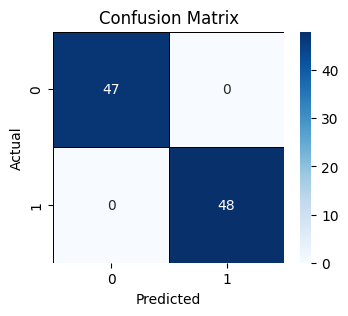

In [321]:
y_pred = clf.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", linewidths=0.5, linecolor="black", square=True,
            xticklabels=[0, 1], yticklabels=[0, 1])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [326]:
feature_importance = clf.feature_importances_
feature_importance 


array([0.0612775 , 0.04286387, 0.03840598, 0.04615853, 0.03317392,
       0.03940799, 0.01761098, 0.02273948, 0.02370678, 0.06817504,
       0.04695514, 0.03033912, 0.03703206, 0.00466   , 0.02060312,
       0.        , 0.03461726, 0.04958173, 0.0222328 , 0.01525273,
       0.05322658, 0.02751715, 0.02292393, 0.04284046, 0.01185909,
       0.00673843, 0.00802834, 0.0111552 , 0.00221824, 0.00495173,
       0.00553605, 0.00625606, 0.00558923, 0.00461117, 0.00609712,
       0.00345983, 0.0040168 , 0.00804832, 0.00266393, 0.00523522,
       0.00252802, 0.0038701 , 0.00094117, 0.00602444, 0.00500809,
       0.00551957, 0.00975206, 0.02184519, 0.04674445])

In [322]:
df6.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [323]:
f_name = [['Age', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager']]

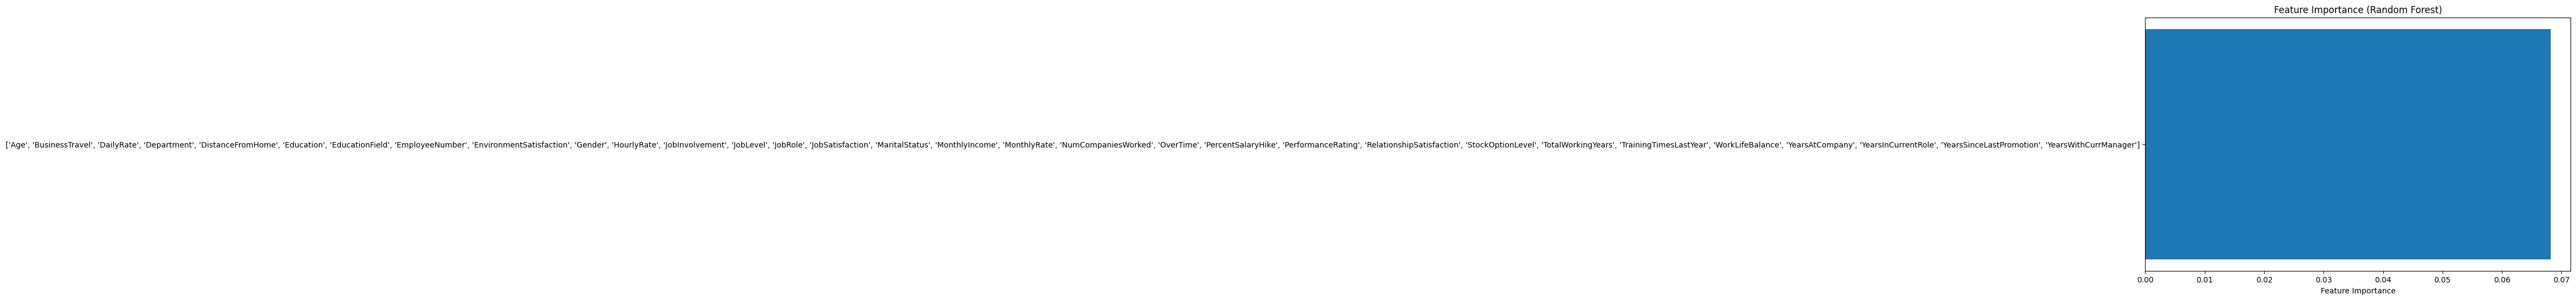

In [324]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have a trained Random Forest model called 'rf_model'
# and X_train contains your training feature matrix

# Get feature importances from the Random Forest model
importances = clf.feature_importances_

# Define feature names manually or access them from wherever you defined them
feature_names = f_name  # Replace with your actual feature names

# Sort feature names by importance
sorted_feature_names = [x for _, x in sorted(zip(importances, feature_names), reverse=True)]

# Sort the importances accordingly
sorted_importances = np.sort(importances)[::-1]

# Create a bar plot of feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_feature_names)), sorted_importances, align='center')
plt.yticks(range(len(sorted_feature_names)), sorted_feature_names)
plt.xlabel('Feature Importance')
plt.title('Feature Importance (Random Forest)')
plt.gca().invert_yaxis()  # Invert the y-axis for better visualization
plt.show()


In [328]:
from sklearn.feature_selection import SelectKBest, chi2

selector = SelectKBest(chi2, k=5)
selector.fit(X, y)

selected_features = X.columns[selector.get_support()]
selected_features

Index(['DailyRate', 'EmployeeNumber', 'MonthlyIncome', 'MonthlyRate',
       'TotalWorkingYears'],
      dtype='object')